<a href="https://colab.research.google.com/github/t108368071/MyProject/blob/master/Randomforest_BP_8_feature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive 

drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/Colab Notebooks/randforest BP

df_all = pd.read_csv("part_1_remove.csv") 

num_features = ['cardiac_period', 'SUT', 'DT','SW_10/DW_10', 'SW_33 + DW_33','SW_75 + DW_75','area','SW_25/DW_25']
target = ['systolic','diastolic']

df = df_all[num_features + target]
df.head()

Mounted at /content/gdrive
[Errno 2] No such file or directory: '/content/gdrive/MyDrive/Colab Notebooks/randforest BP'
/content


FileNotFoundError: ignored

In [ ]:
df.describe()

,cardiac_period,SUT,DT,SW_10/DW_10,SW_33 + DW_33,SW_75 + DW_75,area,SW_25/DW_25,systolic,diastolic
count,17090.000000,17090.000000,17090.00000,17090.000000,17090.000000,17090.000000,17090.000000,17090.000000,17090.000000,17090.000000
mean,93.174195,25.224400,66.73464,0.399130,42.687185,20.324985,1.244152,0.493062,122.706229,65.908933
std,12.368369,5.175703,9.04102,0.092380,8.253466,3.797827,0.345388,0.098944,10.829673,5.743722
min,70.000000,14.000000,45.00000,0.190476,23.000000,10.000000,0.193982,0.146667,90.068528,60.019577
25%,83.000000,22.000000,60.00000,0.326531,37.000000,17.000000,1.126609,0.435897,115.189123,61.504316
50%,93.000000,25.000000,66.00000,0.400000,44.000000,21.000000,1.314651,0.500000,123.135987,63.969919
75%,103.000000,28.000000,73.00000,0.460000,49.000000,23.000000,1.457691,0.555556,132.054791,68.284058
max,128.000000,40.000000,87.00000,0.939394,64.000000,33.000000,2.405724,1.047619,138.971110,83.994197


In [ ]:
df_target = pd.DataFrame(df, columns=["systolic", "diastolic"])
df.drop(["systolic", "diastolic"], axis=1, inplace=True)
df_target.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,systolic,diastolic
0,136.372739,65.402256
1,122.940611,66.672202
2,122.110261,66.379138
3,120.889158,65.060347
4,119.033082,66.623358


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
folds = KFold(n_splits=10, shuffle=False)

In [ ]:
# resplit the data after processing
x_train, x_test, y_train, y_test = train_test_split(df, df_target, test_size=0.3)

In [ ]:
!pip install rfpimp

  Created wheel for rfpimp: filename=rfpimp-1.3.7-cp37-none-any.whl size=10670 sha256=a39ad1694c3c1ddbbaaab11aa60f6e8d8e7a14bec639ff7f1ed156dc5d335cc5
  Stored in directory: /root/.cache/pip/wheels/16/08/23/9d90df482c9c943df4d6fe874c0937f8e81dc3db917c9300c2
Successfully built rfpimp


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


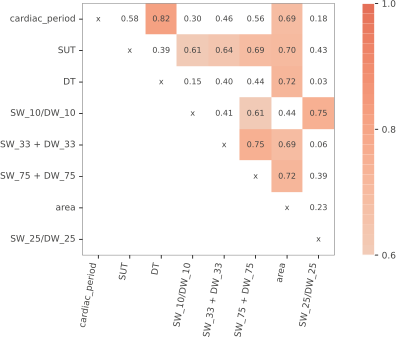

In [ ]:
from rfpimp import plot_corr_heatmap
viz = plot_corr_heatmap(x_train,figsize=(10,5))
viz

##**RandomForest Regressor**




MAE SBP: 4.459644413630828 SD:6.672184996650829 MAE DBP: 2.464702834177776 SD:3.8010530972956333


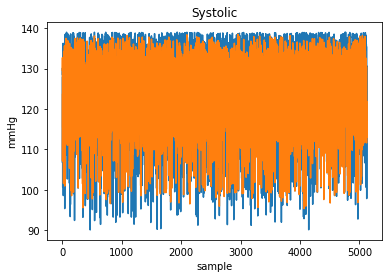

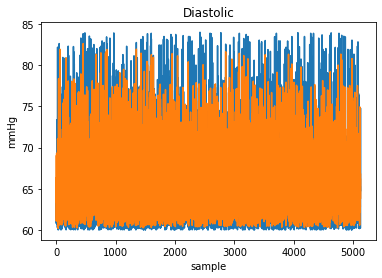

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
regressor = RandomForestRegressor(n_estimators = 100) 
regressor.fit(x_train, y_train)
prediction = regressor.predict(x_test)

error_sbp = mean_absolute_error(prediction[:,0],y_test["systolic"].values)
error_dbp = mean_absolute_error(prediction[:,1],y_test["diastolic"].values)

error_sbp_std = np.std(prediction[:,0] - y_test["systolic"].values)
error_dbp_std = np.std(prediction[:,1] - y_test["diastolic"].values)

print(f"MAE SBP: {error_sbp} SD:{error_sbp_std} MAE DBP: {error_dbp} SD:{error_dbp_std}")

s = np.vstack(y_test["systolic"])
d = np.vstack(y_test["diastolic"])

plt.figure(1)
plt.title("Systolic")
plt.xlabel("sample") 
plt.ylabel("mmHg") 
plt.plot(s)
plt.plot(prediction[:,0])

plt.figure(2)
plt.title("Diastolic")
plt.xlabel("sample") 
plt.ylabel("mmHg") 
plt.plot(d)
plt.plot(prediction[:,1])

## **Linear Regression**

MAE SBP: 8.035016424008937 SD:9.983748705564867 MAE DBP: 4.246639276513258 SD:5.580041421436656


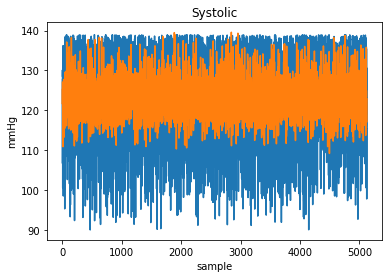

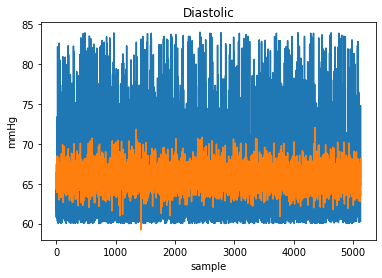

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

linear = LinearRegression()
linear.fit(x_train, y_train)
prediction = linear.predict(x_test)

error_sbp = mean_absolute_error(prediction[:,0],y_test["systolic"].values)
error_dbp = mean_absolute_error(prediction[:,1],y_test["diastolic"].values)

error_sbp_std = np.std(prediction[:,0] - y_test["systolic"].values)
error_dbp_std = np.std(prediction[:,1] - y_test["diastolic"].values)

print(f"MAE SBP: {error_sbp} SD:{error_sbp_std} MAE DBP: {error_dbp} SD:{error_dbp_std}")

s = np.vstack(y_test["systolic"])
d = np.vstack(y_test["diastolic"])

plt.figure(1)
plt.title("Systolic")
plt.xlabel("sample") 
plt.ylabel("mmHg") 
plt.plot(s)
plt.plot(prediction[:,0])

plt.figure(2)
plt.title("Diastolic")
plt.xlabel("sample") 
plt.ylabel("mmHg") 
plt.plot(d)
plt.plot(prediction[:,1])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,r2_score
import numpy as np
forest = RandomForestRegressor(n_estimators=100)
errors_sbp = []
errors_dbp = []

errors_sbp_std = []
errors_dbp_std = []

for i, (train_idx, val_idx) in enumerate(folds.split(x_train, y_train)):
    train_data, train_target = x_train.iloc[train_idx], y_train.iloc[train_idx]
    val_data, val_target = x_train.iloc[val_idx], y_train.iloc[val_idx]
    
    forest.fit(train_data, train_target) 
    predictions = forest.predict(val_data)

    error_sbp = mean_absolute_error(predictions[:,0], val_target["systolic"].values)
    error_dbp = mean_absolute_error(predictions[:,1], val_target["diastolic"].values)

    error_sbp_std = np.std(predictions[:,0] - val_target["systolic"].values)
    error_dbp_std = np.std(predictions[:,1] - val_target["diastolic"].values)

    print(f"Train fold {i} MAE SBP: {error_sbp} SD:{error_sbp_std} MAE DBP: {error_dbp} SD:{error_dbp_std}")

    errors_sbp.append(error_sbp)
    errors_dbp.append(error_dbp)
    errors_sbp_std.append(error_sbp_std)
    errors_dbp_std.append(error_dbp_std)
    
print(f"Average MAE SBP: {np.mean(errors_sbp)} SD:{np.mean(errors_sbp_std)} MAE DBP: {np.mean(errors_dbp)} SD:{np.mean(errors_dbp_std)}")

Train fold 0 MAE SBP: 4.485239684579071 SD:6.769057973027545 MAE DBP: 2.466790196401893 SD:3.9030423054894783
Train fold 1 MAE SBP: 4.557967379129659 SD:6.812043132181345 MAE DBP: 2.4766733766355995 SD:3.8242308757164896
Train fold 2 MAE SBP: 4.19126935722294 SD:6.411890874893439 MAE DBP: 2.319512993423694 SD:3.5746069723387044
Train fold 3 MAE SBP: 4.352058844424703 SD:6.59830365714625 MAE DBP: 2.403943481609642 SD:3.73492363281041
Train fold 4 MAE SBP: 4.528922684510461 SD:6.733238599576889 MAE DBP: 2.4297961696193173 SD:3.7231072113752632
Train fold 5 MAE SBP: 4.262451878674276 SD:6.322196735733939 MAE DBP: 2.429833334201558 SD:3.7473980214655103
Train fold 6 MAE SBP: 4.63024678741137 SD:6.7460335470775785 MAE DBP: 2.5314501373438385 SD:3.7532670451452916
Train fold 7 MAE SBP: 4.494470504700541 SD:6.58551488431857 MAE DBP: 2.5373205781193793 SD:3.814739184675616
Train fold 8 MAE SBP: 4.438412465958536 SD:6.511388818384909 MAE DBP: 2.501609439166022 SD:3.802131085321875
Train fold 9 

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error ,r2_score

#print('The mean absolute error is' , mean_absolute_error(predictions,y_test ))
#print('The mean squared error is' , mean_squared_error(predictions,y_test ))
#print('The R squared error is' , r2_score(predictions,y_test))

import pandas as pd
feature_imp = pd.Series(forest.feature_importances_,index=train_data.columns).sort_values(ascending=False)
feature_imp

cardiac_period    0.214958
SW_33 + DW_33     0.137166
area              0.132509
SUT               0.116941
DT                0.116529
SW_75 + DW_75     0.101808
SW_10/DW_10       0.094868
SW_25/DW_25       0.085220
dtype: float64